In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plot

In [ ]:
# silent all warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


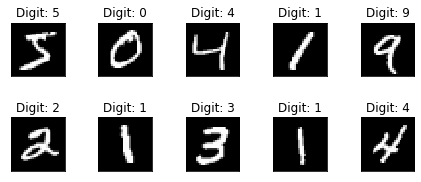

In [ ]:
for i in range(10):
  plot.subplot(3,5,i+1)
  plot.tight_layout()
  plot.imshow(X_train[i], cmap='gray', interpolation='none')
  plot.title("Digit: {}".format(y_train[i]))
  plot.xticks([])
  plot.yticks([])

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Text(0.5, 1.0, 'Digit: 5')

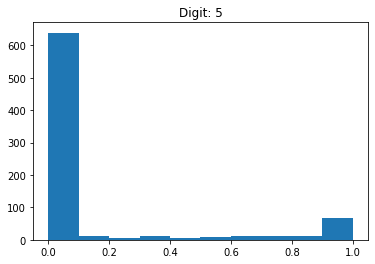

In [ ]:
plot.hist(X_train[0])
plot.title("Digit: {}".format(y_train[0]))

Text(0.5, 1.0, 'Digit: 4')

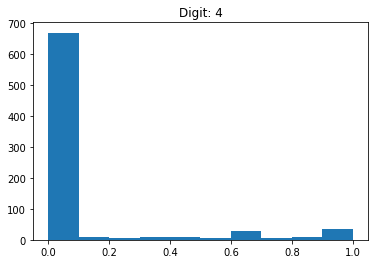

In [ ]:
plot.hist(X_train[2])
plot.title("Digit: {}".format(y_train[2]))

In [ ]:
print(np.unique(y_train, return_counts=True))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
for i in range(5):
   print (Y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
Y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
history = model.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=2,validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 7s - loss: 0.2525 - accuracy: 0.9240 - val_loss: 0.1144 - val_accuracy: 0.9631
Epoch 2/20
469/469 - 6s - loss: 0.1010 - accuracy: 0.9692 - val_loss: 0.0819 - val_accuracy: 0.9739
Epoch 3/20
469/469 - 6s - loss: 0.0733 - accuracy: 0.9766 - val_loss: 0.0675 - val_accuracy: 0.9779
Epoch 4/20
469/469 - 6s - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0605 - val_accuracy: 0.9803
Epoch 5/20
469/469 - 6s - loss: 0.0466 - accuracy: 0.9847 - val_loss: 0.0594 - val_accuracy: 0.9825
Epoch 6/20
469/469 - 6s - loss: 0.0374 - accuracy: 0.9874 - val_loss: 0.0787 - val_accuracy: 0.9796
Epoch 7/20
469/469 - 6s - loss: 0.0331 - accuracy: 0.9888 - val_loss: 0.0606 - val_accuracy: 0.9821
Epoch 8/20
469/469 - 6s - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0686 - val_accuracy: 0.9818
Epoch 9/20
469/469 - 6s - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0718 - val_accuracy: 0.9814
Epoch 10/20
469/469 - 6s - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0591 - val_accuracy: 0.9840

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0733 - accuracy: 0.9840
313/313 - 1s - loss: 0.0733 - accuracy: 0.9840
Test Loss 0.07328667491674423
Test Accuracy 0.984000027179718
